In [53]:
import numpy as np
import numpy.polynomial.polynomial as poly

import matplotlib.pyplot as plt
from scipy import interpolate


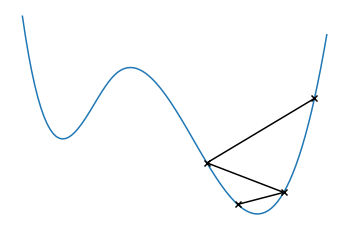

In [67]:
x = [-5, -4, -2, 1, 5]
y = [5, 1, 3, 0, 5]
tck = interpolate.splrep(x, y)

plt.figure()

domain = np.arange(-5, 5, 0.1)
plt.plot(domain, interpolate.splev(domain, tck), zorder=0)

points = np.array([4.5, 1, 3.5, 2])
plt.scatter(points, interpolate.splev(points, tck), color='black', marker='x')
plt.plot(points, interpolate.splev(points, tck), color='black')

plt.xticks([])
plt.yticks([])
plt.gca().axis('off')
plt.savefig('nelder-mead.png', dpi=800)

[ 18.46603175 -11.89302597   1.83996392]


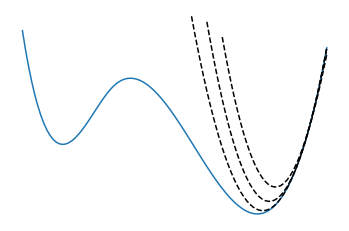

In [68]:
x = [-5, -4, -2, 1, 5]
y = [5, 1, 3, 0, 5]
tck = interpolate.splrep(x, y)

plt.figure()

domain = np.arange(-5, 5, 0.1)
plt.plot(domain, interpolate.splev(domain, tck))

domain = np.arange(4.8, 5, 0.1)
coefs = poly.polyfit(domain, interpolate.splev(domain, tck), 2)
ffit = poly.polyval(np.arange(1.5, 5, 0.1), coefs)
print(coefs)
plt.plot(np.arange(1.5, 5, 0.1), ffit, color='black', linestyle='--')

domain = np.arange(4.2, 4.6, 0.1)
coefs = poly.polyfit(domain, interpolate.splev(domain, tck), 2)
ffit = poly.polyval(np.arange(1, 5, 0.1), coefs)
plt.plot(np.arange(1, 5, 0.1), ffit, color='black', linestyle='--')

domain = np.arange(3.5, 4, 0.1)
coefs = poly.polyfit(domain, interpolate.splev(domain, tck), 2)
ffit = poly.polyval(np.arange(0.5, 5, 0.1), coefs)
plt.plot(np.arange(0.5, 5, 0.1), ffit, color='black', linestyle='--')

plt.xticks([])
plt.yticks([])
plt.gca().axis('off')
plt.savefig('SLSQP.png', dpi=800)
